## **Business Case**
 Accessibility for the Deaf and Hard of Hearing Community



Problem:   
Communication barriers exist between the deaf/hard of hearing community and the hearing community due to the limited number of people who know sign language. This creates challenges in education, employment, healthcare, and social interactions.    
Learning ISL can be challenging due to the lack of accessible and affordable resources. Traditional classes can be expensive and inconvenient.  
  
  
Proposed Solution:  
 An ISL recognition app powered by our AI model. Users can point their phone's camera at someone signing, and the app will translate the sign language into text or speech in real-time.  
 An ISL learning app that uses our AI model to provide interactive lessons, quizzes, and feedback on users' signing.  
  
Benefits:  
Improved accessibility for the deaf/hard of hearing community.  
Increased inclusivity in various aspects of life.  
Enhanced communication and understanding between communities.    
Potential for educational and vocational training tools.    
More accessible and affordable ISL education.  
Personalized learning experience with AI-powered feedback.  
Convenient learning anytime, anywhere.  
Potential to gamify the learning process to increase engagement.  
  
ROI:  
Social impact:  
 Significant positive impact on the lives of deaf/hard of hearing individuals.  
Potential market for a paid app or licensing the technology to other organizations.    
Brand enhancement through social responsibility initiatives.
Grant funding opportunities for accessibility projects.  
Revenue from app sales or subscriptions.  
Potential partnerships with educational institutions or organizations.  
Scalable solution with low marginal cost per user.  

## **Domain Analysis**

1. Data Characteristics (Image-Specific):  
  
Static Images: Your model uses static images, capturing a single frame of the sign. This means it relies on hand shape, position, and potentially some facial expression visible in the image, but loses temporal information (movement). This is a key limitation to acknowledge.    
Image Quality: Images can vary in quality due to factors like lighting, camera angle, background clutter, and image resolution. Your model needs to be robust to these variations.    
Hand Shape and Position: The core information lies in the specific configuration of the hands (hand shape) and their placement relative to the body (position). Accurate extraction of these features is vital.    
Facial Expressions (Limited): While facial expressions are part of ISL, a single static image may only capture a limited snapshot. Your model might leverage these cues if visible, but their consistency and informativeness will vary.  

  
2. Challenges (Image-Specific):  

Loss of Temporal Information: The biggest challenge is that using only static images discards the crucial temporal (movement) component of ISL. Many signs are distinguished primarily by how the hands move, not just their static pose. This will limit the model's ability to differentiate between certain signs.  
Hand Segmentation: Accurately isolating the hands from the background in images can be difficult, especially with complex backgrounds or similar skin tones.    
Feature Extraction (Static): Extracting the most informative static features (hand shape, position) that are robust to variations in lighting, angle, and background is crucial.  
Limited Facial Expression Information: The inconsistency and limited nature of facial expression cues in single images make them unreliable features.  
  
3. Requirements (Image-Specific):
  
Accuracy (with Static Limitation): Given the limitation of static images, the model should aim for the highest possible accuracy achievable within this constraint. Be realistic about the expected accuracy, as it won't be as high as a model using video.  
Robustness to Image Variations: The model must be robust to variations in lighting, camera angle, and background clutter.  
Efficient Feature Extraction (Static): The feature extraction process needs to efficiently capture the essential static hand shape and position information.
  
4. Domain-Specific Knowledge (Image-Specific):
  
Static Hand Shapes in ISL: Focus on the most discriminative static hand shapes used in ISL.
Key Hand Positions Relative to Body: Understand the important hand positions that are used to distinguish signs.  
Limitations of Static Representation: Be aware of the specific signs that are impossible or very difficult to recognize from a single image. This will manage expectations about the model's capabilities.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/AI projects/Indian Sign Lang/Data.zip"
extract_path = os.path.dirname(zip_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed successfully!")


Extraction completed successfully!


In [4]:
!pip install split-folders

In [5]:
import splitfolders

data_dir = "/content/drive/MyDrive/AI projects/Indian Sign Lang/Data"

# Split dataset (80% Train, 10% Validation, 10% Test)
splitfolders.ratio(data_dir, output=f"{data_dir}_split", seed=42, ratio=(0.8, 0.1, 0.1), move=True)


Copying files: 4972 files [00:19, 255.95 files/s]


In [8]:
split_dir = "/content/drive/MyDrive/AI projects/Indian Sign Lang/Data_split"
print("Classes in train:", os.listdir(f"{split_dir}/train"))
print("Classes in val:", os.listdir(f"{split_dir}/val"))
print("Classes in test:", os.listdir(f"{split_dir}/test"))


Classes in train: ['S', 'I', 'G', 'R', 'W', 'X', 'T', 'C', 'V', 'D', 'O', 'E', 'N', 'K', 'A', 'Y', 'Q', 'P', 'M', 'H', 'B', 'U', 'F', 'L']
Classes in val: ['S', 'I', 'G', 'R', 'W', 'X', 'T', 'C', 'V', 'D', 'O', 'E', 'N', 'K', 'A', 'Y', 'Q', 'P', 'M', 'H', 'B', 'U', 'F', 'L']
Classes in test: ['S', 'I', 'G', 'R', 'W', 'X', 'T', 'C', 'V', 'D', 'O', 'E', 'N', 'K', 'A', 'Y', 'Q', 'P', 'M', 'H', 'B', 'U', 'F', 'L']


In [9]:
 ## Importing all the libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import shuffle


In [10]:
# Dataset labels
labels = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
img_size = 64
num_classes = len(labels)

# Function to load dataset
def get_data(data_dir):
    data, class_labels = [], []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]  # Convert BGR to RGB
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Resize images
                data.append(resized_arr)
                class_labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data, dtype='float32') / 255, to_categorical(class_labels, num_classes)


In [11]:
# Load datasets
train_dir = "/content/drive/MyDrive/AI projects/Indian Sign Lang/Data_split/train"
val_dir = "/content/drive/MyDrive/AI projects/Indian Sign Lang/Data_split/val"
test_dir = "/content/drive/MyDrive/AI projects/Indian Sign Lang/Data_split/test"

x_train, y_train = get_data(train_dir)
x_val, y_val = get_data(val_dir)
x_test, y_test = get_data(test_dir)


In [12]:
# Shuffle the dataset (important to prevent patterns)
x_train, y_train = shuffle(x_train, y_train, random_state=42)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)


In [14]:
x_train.shape

(3966, 64, 64, 3)

**For Creating a Custom CNN model** ,  
 After some trail and errors , I/We have decided to add some more techniques to reduce overfitting of the our model -  
 1) L2 Reularization  
 2) BatchNormalization to each layer  
 3) Adam optimizer with custom learning rate of 0.005

In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.4),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.6),
    Dense(num_classes, activation="softmax")  # 24 classes
])

# Compile Model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)

# Compile Model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           6,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,243,896 (8.56 MB)

 Trainable params: 2,243,448 (8.56 MB)

 Non-trainable params: 448 (1.75 KB)

Here , with early stopping added one more parameter called   
ReduceLROnPlateau - which eventually reduces the learning while epochs are runnning

In [16]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [17]:
# Train Model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


124/124 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - accuracy: 0.1157 - loss: 4.7451 - val_accuracy: 0.0619 - val_loss: 21.9617 - learning_rate: 5.0000e-04
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.3149 - loss: 2.8343 - val_accuracy: 0.0268 - val_loss: 30.9609 - learning_rate: 5.0000e-04
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.4551 - loss: 2.2981 - val_accuracy: 0.0247 - val_loss: 41.9269 - learning_rate: 5.0000e-04
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5483 - loss: 1.9167 - val_accuracy: 0.0433 - val_loss: 21.3190 - learning_rate: 5.0000e-04
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.6412 - loss: 1.6257 - val_accuracy: 0.2660 - val_loss: 8.0296 - learning_rate: 5.0000e-04
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.6791 - loss: 1.5261 - val_accuracy: 0.8309 - val_loss: 1.2181 - learning_rate: 5.0000e-04
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accura

In [18]:
# Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Custom CNN - Test Accuracy: {test_acc * 100:.2f}%, Test Loss: {test_loss:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9949 - loss: 0.3009
Custom CNN - Test Accuracy: 99.23%, Test Loss: 0.3137


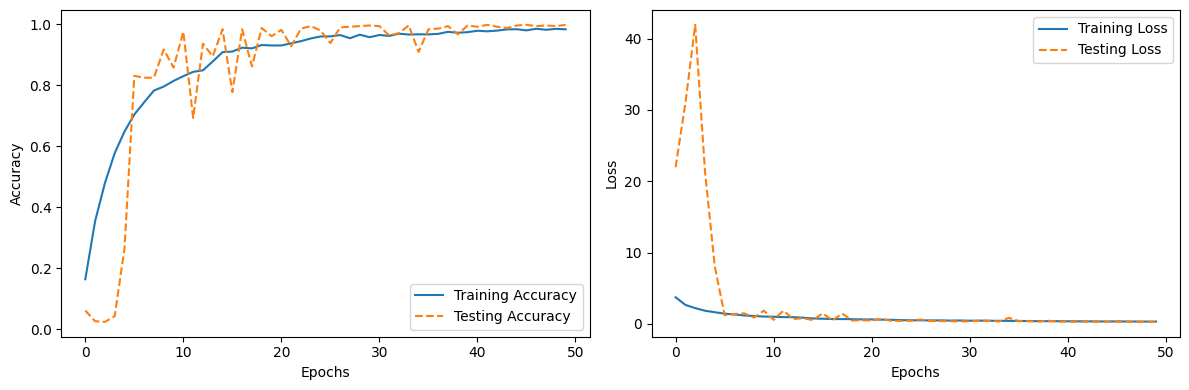

In [19]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

As our Custom CNN model is has a good accuracy but also have more loss than expected , as our model is giving unsatifoactory results , we will now use transfer learning and Import **MobileNetV2** model.  
Replaced Flatten layer with GlobalAveragePooling for efficiency

In [20]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

# Load MobileNetV2 (without the top layer)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

# Freeze all layers in base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(24, activation="softmax")(x)  # 24 classes

# Create final model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32)


<ipython-input-20-3059993a76ff>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.2705 - loss: 2.8487 - val_accuracy: 0.9113 - val_loss: 0.6187
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8412 - loss: 0.6702 - val_accuracy: 0.9588 - val_loss: 0.2796
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9216 - loss: 0.3437 - val_accuracy: 0.9691 - val_loss: 0.1770
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9490 - loss: 0.2336 - val_accuracy: 0.9732 - val_loss: 0.1313
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9657 - loss: 0.1604 - val_accuracy: 0.9794 - val_loss: 0.1010
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9771 - loss: 0.1113 - val_accuracy: 0.9856 - val_loss: 0.0808
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9839 - loss: 0.0915 - val_accuracy: 0.9938 - val_loss: 0.0649
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

In [21]:
# Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"MobileNetV2 - Test Accuracy: {test_acc * 100:.2f}%, Test Loss: {test_loss:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9994 - loss: 0.0074
MobileNetV2 - Test Accuracy: 99.81%, Test Loss: 0.0131


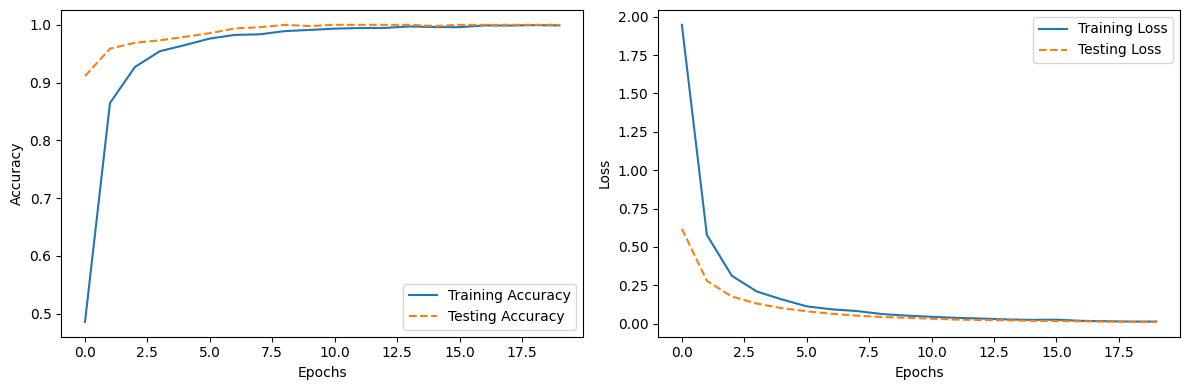

In [22]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**MobileNetv2** is giving us the satifactory results as the accuracy is increased as well the loss has decreased.

In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load ResNet50 (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

# Freeze all layers initially
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(24, activation="softmax")(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile model (Training only custom layers)
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train new layers
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)


# Unfreeze last 20 layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Reduce learning rate when val_loss stops improving
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# Recompile model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])

# Fine-tune model
history_fine = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32, callbacks=[reduce_lr])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.0439 - loss: 3.3104 - val_accuracy: 0.2144 - val_loss: 3.0807
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0790 - loss: 3.1408 - val_accuracy: 0.1918 - val_loss: 3.0161
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1105 - loss: 3.0617 - val_accuracy: 0.2412 - val_loss: 2.9456
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1597 - loss: 2.9578 - val_accuracy: 0.3072 - val_loss: 2.8722
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1988 - loss: 2.8833 - val_accuracy: 0.2763 - val_loss: 2.7986
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2200 - loss: 2.8059 - val_accuracy: 0.4021 - val_loss: 2.7210
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2524 - loss: 2.7289 - val_accuracy: 0.3835 - val_loss: 2.6475
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 1

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"ResNet50 - Test Accuracy: {test_acc * 100:.2f}%, Test Loss: {test_loss:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9978 - loss: 0.0191
ResNet50 - Test Accuracy: 99.42%, Test Loss: 0.0294


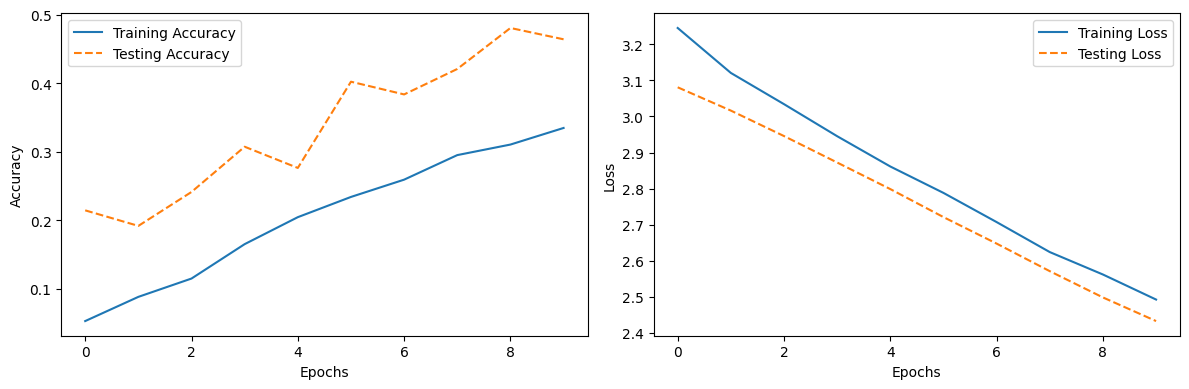

In [25]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

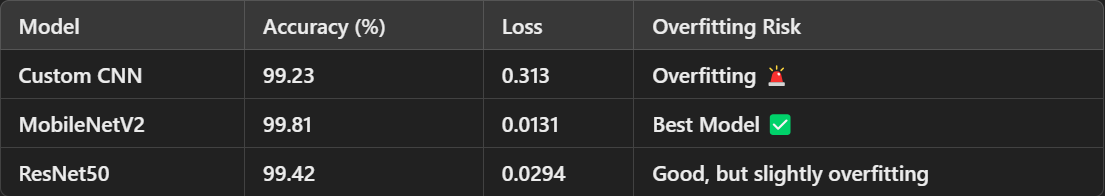

we evaluated **Custom CNN, MobileNetV2, and ResNet50** for Indian Sign Language Detection based on accuracy and loss.  

**MobileNetV2** performed the best, achieving 99.81% accuracy with a loss of 0.0131, indicating excellent generalization.   
**ResNet50** also performed well with 99.42% accuracy and 0.0294 loss, but showed slight overfitting.   
**Custom CNN**, despite achieving 99.23% accuracy, had a significantly higher loss of 0.313, indicating overfitting.   
  
  Based on these results, **MobileNetV2** is the optimal model for deployment due to its highest accuracy and lowest loss, ensuring superior performance and generalization.


